# Investigating trends in COVID-19 survey responses based on patient status using SVM
BIOF 509
Final Project

In [1]:
# import base packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pre-processing the data

1. Read in data from excel file, look at format and visualize feature relationships

In [18]:
file_path = '/Users/goyalsl/Desktop/BIOF2.xlsx' # replace with your own path
df = pd.read_excel(file_path)
df.head()
display(df.describe())

,SUBJECT_STATUS,ENJOY_DECREASE,FOCUS,SOLVE_PROBLEMS_DECREASE,TIME_OTHRS,SOCIAL_DISTANCE,STRESS_SOCIAL_DISTANCE,WORRY,WORRY_INFECTED,WORRY_FMLY_INFECTED,WORRY_OTHRS_INFECTED,AFFORD_FOOD,WORRY_RESOURCES,FINANCIAL_PROBLEM,SEEK_INFO,LIFE_DIFFICULTY_PAST_WEEK,DISTRESS_PAST_WEEK,AVOID_INFORM,HOPE_END_SOON,HOPE_CURE_YR
count,149.000000,150.000000,150.000000,149.000000,150.000000,149.000000,148.000000,150.000000,149.000000,150.000000,149.000000,149.000000,150.000000,148.000000,147.000000,149.000000,150.00000,149.000000,150.000000,150.000000
mean,1.375839,6.260000,5.880000,3.979866,8.553333,8.812081,6.506757,7.146667,5.852349,7.480000,6.731544,2.456376,2.186667,3.263514,2.578231,5.241611,5.92000,3.536913,4.073333,5.553333
std,0.485972,2.698322,2.621337,2.646951,2.064519,1.396758,2.893804,2.383913,2.576861,2.370739,2.475913,2.510742,2.456020,2.909897,0.859477,2.712959,2.85328,2.641978,2.956273,2.760062
min,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,4.000000,1.000000,8.000000,8.000000,4.000000,6.000000,4.000000,6.000000,5.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.00000,1.000000,1.000000,3.000000
50%,1.000000,7.000000,6.000000,4.000000,9.000000,9.000000,7.000000,8.000000,6.000000,8.000000,7.000000,1.000000,1.000000,2.000000,2.000000,5.000000,6.00000,3.000000,3.000000,6.000000
75%,2.000000,8.000000,8.000000,6.000000,10.000000,10.000000,9.000000,9.000000,8.000000,9.000000,9.000000,3.000000,2.000000,4.250000,3.000000,7.000000,8.00000,5.000000,6.000000,8.000000
max,2.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,10.000000,10.00000,10.000000,10.000000,10.000000


2. Look at missing data to see how much missing data we have/how to best address it

In [19]:
# Look at just the first few lines to see if there is missing data
display(df.isna().head())

# Sum of missing values from each feature
np.sum(df.isna())

,SUBJECT_STATUS,ENJOY_DECREASE,FOCUS,SOLVE_PROBLEMS_DECREASE,TIME_OTHRS,SOCIAL_DISTANCE,STRESS_SOCIAL_DISTANCE,WORRY,WORRY_INFECTED,WORRY_FMLY_INFECTED,WORRY_OTHRS_INFECTED,AFFORD_FOOD,WORRY_RESOURCES,FINANCIAL_PROBLEM,SEEK_INFO,LIFE_DIFFICULTY_PAST_WEEK,DISTRESS_PAST_WEEK,AVOID_INFORM,HOPE_END_SOON,HOPE_CURE_YR
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


SUBJECT_STATUS               1
ENJOY_DECREASE               0
FOCUS                        0
SOLVE_PROBLEMS_DECREASE      1
TIME_OTHRS                   0
SOCIAL_DISTANCE              1
STRESS_SOCIAL_DISTANCE       2
WORRY                        0
WORRY_INFECTED               1
WORRY_FMLY_INFECTED          0
WORRY_OTHRS_INFECTED         1
AFFORD_FOOD                  1
WORRY_RESOURCES              0
FINANCIAL_PROBLEM            2
SEEK_INFO                    3
LIFE_DIFFICULTY_PAST_WEEK    1
DISTRESS_PAST_WEEK           0
AVOID_INFORM                 1
HOPE_END_SOON                0
HOPE_CURE_YR                 0
dtype: int64

In [20]:
#  We have a lot of data already, so let's drop all indexes with missing feature values
data_dropped = df.dropna()

# And now let's see how that has affected our data
display(data_dropped.head())
print(df.shape, data_dropped.shape)
print("percent dropped", 1-(data_dropped.shape[0]/df.shape[0]))

,SUBJECT_STATUS,ENJOY_DECREASE,FOCUS,SOLVE_PROBLEMS_DECREASE,TIME_OTHRS,SOCIAL_DISTANCE,STRESS_SOCIAL_DISTANCE,WORRY,WORRY_INFECTED,WORRY_FMLY_INFECTED,WORRY_OTHRS_INFECTED,AFFORD_FOOD,WORRY_RESOURCES,FINANCIAL_PROBLEM,SEEK_INFO,LIFE_DIFFICULTY_PAST_WEEK,DISTRESS_PAST_WEEK,AVOID_INFORM,HOPE_END_SOON,HOPE_CURE_YR
0,1.0,10,5,1.0,2,8.0,7.0,8,6.0,8,5.0,1.0,1,6.0,1.0,9.0,10,4.0,8,6
1,2.0,10,9,9.0,10,9.0,7.0,10,6.0,9,9.0,3.0,3,3.0,3.0,6.0,7,2.0,2,2
2,1.0,6,5,5.0,8,10.0,8.0,8,8.0,8,9.0,2.0,2,1.0,2.0,3.0,8,3.0,1,1
3,1.0,4,4,6.0,1,9.0,3.0,5,5.0,7,7.0,2.0,1,1.0,2.0,6.0,8,5.0,1,1
4,1.0,4,8,2.0,8,8.0,5.0,6,2.0,7,6.0,1.0,1,1.0,2.0,3.0,5,4.0,3,7


(150, 20) (137, 20)
percent dropped 0.08666666666666667


4. Separating out the labels from the data

In [21]:
# Labels are the values we want to predict. Let's save these before removing them
labels = np.array(data_dropped['SUBJECT_STATUS'])
# Remove the labels from the datafile
data_dropped= data_dropped.drop('SUBJECT_STATUS', axis = 1)
# Saving feature names for later visualization/interpretation
df_list = list(data_dropped.columns)


5. Scaling the data

In [22]:
# Let's use normalization because we cannot assume a Gaussian distribution

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data_dropped)
display(scaled_data[0:4])
scaled_data = pd.DataFrame(scaled_data, columns=data_dropped.columns)
display(scaled_data.head())

array([[1.        , 0.44444444, 0.        , 0.11111111, 0.71428571,
        0.66666667, 0.77777778, 0.55555556, 0.77777778, 0.44444444,
        0.        , 0.        , 0.55555556, 0.        , 0.88888889,
        1.        , 0.33333333, 0.77777778, 0.55555556],
       [1.        , 0.88888889, 0.88888889, 1.        , 0.85714286,
        0.66666667, 1.        , 0.55555556, 0.88888889, 0.88888889,
        0.22222222, 0.22222222, 0.22222222, 0.5       , 0.55555556,
        0.66666667, 0.11111111, 0.11111111, 0.11111111],
       [0.55555556, 0.44444444, 0.44444444, 0.77777778, 1.        ,
        0.77777778, 0.77777778, 0.77777778, 0.77777778, 0.88888889,
        0.11111111, 0.11111111, 0.        , 0.25      , 0.22222222,
        0.77777778, 0.22222222, 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.55555556, 0.        , 0.85714286,
        0.22222222, 0.44444444, 0.44444444, 0.66666667, 0.66666667,
        0.11111111, 0.        , 0.        , 0.25      , 0.55555556,
        0.777

,ENJOY_DECREASE,FOCUS,SOLVE_PROBLEMS_DECREASE,TIME_OTHRS,SOCIAL_DISTANCE,STRESS_SOCIAL_DISTANCE,WORRY,WORRY_INFECTED,WORRY_FMLY_INFECTED,WORRY_OTHRS_INFECTED,AFFORD_FOOD,WORRY_RESOURCES,FINANCIAL_PROBLEM,SEEK_INFO,LIFE_DIFFICULTY_PAST_WEEK,DISTRESS_PAST_WEEK,AVOID_INFORM,HOPE_END_SOON,HOPE_CURE_YR
0,1.000000,0.444444,0.000000,0.111111,0.714286,0.666667,0.777778,0.555556,0.777778,0.444444,0.000000,0.000000,0.555556,0.00,0.888889,1.000000,0.333333,0.777778,0.555556
1,1.000000,0.888889,0.888889,1.000000,0.857143,0.666667,1.000000,0.555556,0.888889,0.888889,0.222222,0.222222,0.222222,0.50,0.555556,0.666667,0.111111,0.111111,0.111111
2,0.555556,0.444444,0.444444,0.777778,1.000000,0.777778,0.777778,0.777778,0.777778,0.888889,0.111111,0.111111,0.000000,0.25,0.222222,0.777778,0.222222,0.000000,0.000000
3,0.333333,0.333333,0.555556,0.000000,0.857143,0.222222,0.444444,0.444444,0.666667,0.666667,0.111111,0.000000,0.000000,0.25,0.555556,0.777778,0.444444,0.000000,0.000000
4,0.333333,0.777778,0.111111,0.777778,0.714286,0.444444,0.555556,0.111111,0.666667,0.555556,0.000000,0.000000,0.000000,0.25,0.222222,0.444444,0.333333,0.222222,0.666667


6. Reduce the dimensions of our data

In [31]:
# We'll use PCA because we are using supervised learning
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_data)

print(pca.components_)
print(pca.explained_variance_ratio_)

[[ 0.32015376 -0.2335779   0.26243698  0.10153308  0.01531244  0.31145393
   0.20709714  0.19930663  0.18943309  0.22886741  0.25296992  0.21158258
   0.27626551  0.12335663  0.33697989  0.3788701   0.10312241 -0.08963779
  -0.13992003]
 [ 0.06493217 -0.15154688  0.00918281  0.02965504 -0.21099607  0.13657447
  -0.37263388 -0.46988893 -0.36995314 -0.39475832  0.09761645  0.24017131
   0.21617259 -0.12409552  0.10694756  0.05278069  0.30146906 -0.03580227
  -0.14352739]
 [-0.04928638  0.37093174 -0.16062949  0.08915831 -0.0561056   0.15673428
  -0.00078077  0.09637857  0.11537744  0.04593028  0.20455875  0.25532089
   0.24267514 -0.00409261 -0.11733555 -0.06468603  0.24755833  0.67754411
   0.26374406]]
[0.30883772 0.12477792 0.09879908]


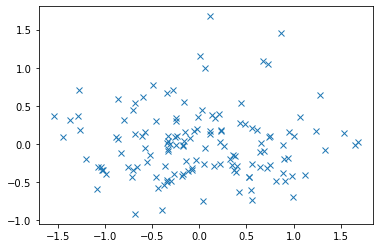

In [24]:
#Visualize the PCA
plt.plot(pca_data[:,0], pca_data[:,1], 'x')

In [25]:
type(pca_data)


numpy.ndarray

In [32]:
pca_data = pd.DataFrame(pca_data, columns=['pca1','pca2', 'pca3'])
pca_data.head()

,pca1,pca2,pca3
0,0.231857,0.189405,0.201321
1,0.555786,-0.264549,-0.216303
2,0.215006,-0.263108,-0.438666
3,-0.150856,0.157152,-0.702541
4,-0.685549,0.127135,-0.054585


In [33]:
#scale PCA data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

pca_data = scaler.fit_transform(pca_data)
display(pca_data[0:4])
pca_data = pd.DataFrame(pca_data, columns=['pca1','pca2', 'pca3'])
display(pca_data.head())

array([[0.54973669, 0.4262314 , 0.46792063],
       [0.65011678, 0.25088568, 0.25681822],
       [0.54451492, 0.25144246, 0.144417  ],
       [0.4311404 , 0.41377304, 0.01103236]])

,pca1,pca2,pca3
0,0.549737,0.426231,0.467921
1,0.650117,0.250886,0.256818
2,0.544515,0.251442,0.144417
3,0.431140,0.413773,0.011032
4,0.265448,0.402179,0.338564


# SVM

1. Running SVM

In [34]:
#import what you'll need:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix

#we'll try a linear SVM with 5 splits
svm_model = SVC(kernel='linear')
skf = StratifiedKFold(n_splits=5)

all_feature_importances = np.zeros((len(set(labels)),len(pca_data.columns)))
all_labels = []
all_predictions = []

#we are summing the averages for each of 5 random test sets
accuracy = 0

for train_index, test_index in skf.split(pca_data.values, labels):
        #Create our training and testing datasets
        X_train, y_train = pca_data.values[train_index], labels[train_index]
        X_test, y_test = pca_data.values[test_index], labels[test_index]

        #fit model
        svm_model.fit(X_train,y_train)
        
        #determining coefficients indicating importance of each feature
        all_feature_importances += svm_model.coef_
        
        #predicting our labels
        predictions = svm_model.predict(X_test)
        
        

        all_predictions.extend(predictions)
        all_labels.extend(y_test)
        accuracy += accuracy_score(predictions,y_test)

print("PREDICTION ACCURACY")
print(accuracy/5)
print()
print('ALL LABELS')
print(all_labels)
print()
print('ALL PREDICTIONS')
print(all_predictions)

PREDICTION ACCURACY
0.6277777777777779

ALL LABELS
[1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0]

ALL PREDICTIONS
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

In [29]:
len(all_labels)

137

2. Generate a confusion matrix

<AxesSubplot:>

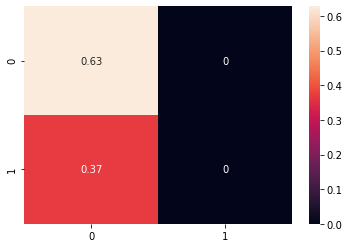

In [30]:
#enter the labels and predictions to a confusion matrix and convert to dataframe
cm = confusion_matrix(all_labels,all_predictions,normalize= 'all')
df_cm = pd.DataFrame(cm,index=[0,1],columns=[0,1])

#graph with labels:
sns.heatmap(df_cm, annot=True)

3. Make a graph visualizing feature importance

Text(0.5, 1.0, 'Feature Importances')

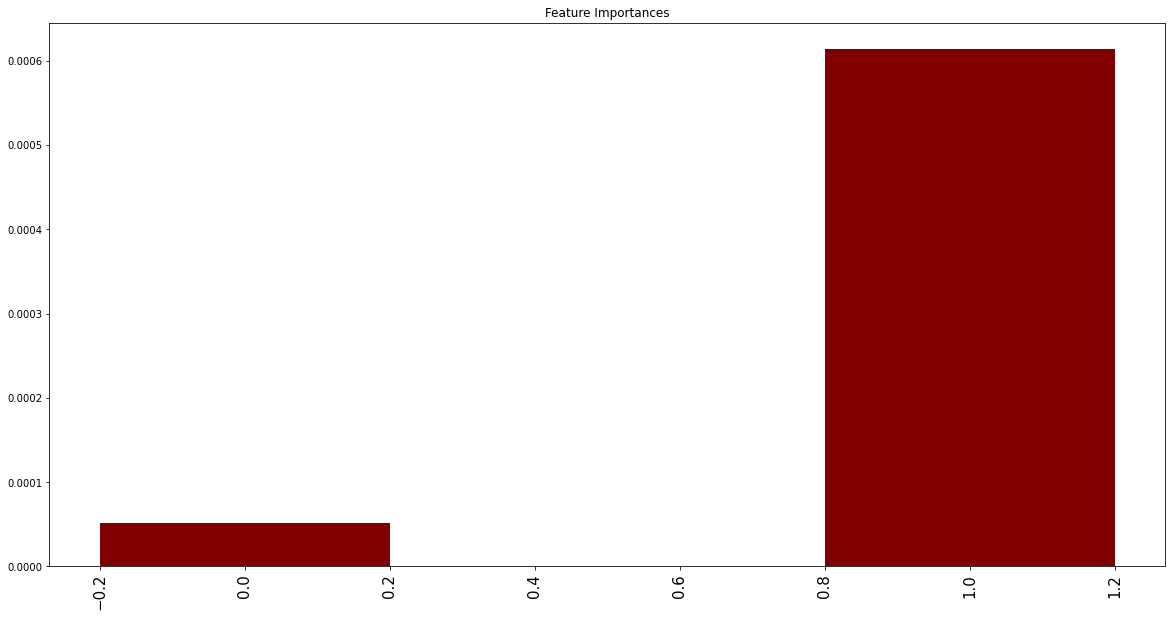

In [30]:
average_feature_importances = []

for i in range(all_feature_importances.shape[1]):
    average_value = 0
    for array in all_feature_importances:
        average_value += abs(array[i])
    average_feature_importances.append(average_value/5)

#we have a lot of features, so let's make this graph big
plt.figure(figsize = (20,10))
#add the bars to the graph
plt.bar([0,1],average_feature_importances, color ='maroon',  width = 0.4)
plt.tick_params(axis='x', which='major', labelsize=15, rotation=90)
plt.title('Feature Importances')